In [2]:
from google.colab import drive
drive.mount('./MyDrive')

Mounted at ./MyDrive


In [3]:
file_path = '/content/MyDrive/MyDrive/ML&DM/data/enron1/enron1/ham/0007.1999-12-14.farmer.ham.txt'

with open(file_path, 'r') as infile:
  ham_sample = infile.read()

print(ham_sample)

Subject: mcmullen gas for 11 / 99
jackie ,
since the inlet to 3 river plant is shut in on 10 / 19 / 99 ( the last day of
flow ) :
at what meter is the mcmullen gas being diverted to ?
at what meter is hpl buying the residue gas ? ( this is the gas from teco ,
vastar , vintage , tejones , and swift )
i still see active deals at meter 3405 in path manager for teco , vastar ,
vintage , tejones , and swift
i also see gas scheduled in pops at meter 3404 and 3405 .
please advice . we need to resolve this as soon as possible so settlement
can send out payments .
thanks


In [4]:
import glob
import os

mails = []
labels = []
          
spam_path = '/content/MyDrive/MyDrive/ML&DM/data/enron1/enron1/spam/'

for filename in glob.glob(os.path.join(spam_path, '*.txt')):
  with open(filename, 'r', encoding = 'ISO-8859-1') as infile : 
    mails.append(infile.read())
    labels.append(1)

ham_path = '/content/MyDrive/MyDrive/ML&DM/data/enron1/enron1/ham/'

for filename in glob.glob(os.path.join(ham_path, '*.txt')):
  with open(filename, 'r', encoding = 'ISO-8859-1') as infile : 
    mails.append(infile.read())
    labels.append(0)

print(len(mails))

5169


In [5]:
import nltk
nltk.download('names')
nltk.download('wordnet')

[nltk_data] Downloading package names to /root/nltk_data...
[nltk_data]   Unzipping corpora/names.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [6]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.datasets import fetch_20newsgroups
from nltk.corpus import names
from nltk.stem import WordNetLemmatizer

cv = CountVectorizer(stop_words=["the", "a", "an"], max_features=500)
cleaned_mails = []
all_names = set(names.words())
lemmatizer = WordNetLemmatizer()

for post in mails:
  lemmatized_list = [lemmatizer.lemmatize(word.lower()) 
  for word in post.split()
  if word.isalpha() and word not in all_names]

  cleaned_mails.append(' '.join(lemmatized_list))

In [7]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(cleaned_mails, labels, test_size = 0.3, random_state=0)

print(x_train[0])

reliant s attempt at humor look what our competition think about u forwarded by steve venturatos hou ect on pm angie zeman enron pm to steve venturatos hou ect ect cc subject reliant s attempt at humor thought you might like to see and get a laugh at what s going around thought you would find the below press release a bit humorous everyone is always looking to bash and from the look of the cc s it ha made a good loop around at both reliant and the diner for immediate release today enron and hades announced a definitive energy service agreement said to be worth an estimated trillion in the deal enron will provide both gas and electric commodity to hades facility throughout and under north america john d rockefeller former ceo of energy monopolist standard oil is now head of hades energy management division said rockefeller obviously hell ha significant heating demand while eternal flame are a great idea in concept they require vast and reliable fuel resource enron wa the only supplier w

In [8]:
term_docs_train = cv.fit_transform(x_train)
term_docs_test = cv.transform(x_test)

print(term_docs_train[0])
print('\n')
print(term_docs_test[0])

  (0, 31)	4
  (0, 234)	2
  (0, 478)	2
  (0, 307)	1
  (0, 431)	1
  (0, 1)	1
  (0, 147)	1
  (0, 54)	2
  (0, 399)	2
  (0, 180)	2
  (0, 116)	3
  (0, 296)	1
  (0, 329)	2
  (0, 123)	7
  (0, 438)	12
  (0, 57)	2
  (0, 402)	1
  (0, 497)	3
  (0, 226)	2
  (0, 371)	2
  (0, 23)	14
  (0, 160)	2
  (0, 164)	1
  (0, 493)	1
  (0, 138)	1
  :	:
  (0, 177)	2
  (0, 465)	2
  (0, 274)	1
  (0, 78)	2
  (0, 259)	1
  (0, 384)	1
  (0, 348)	1
  (0, 309)	1
  (0, 222)	1
  (0, 496)	1
  (0, 298)	1
  (0, 492)	1
  (0, 44)	1
  (0, 192)	1
  (0, 56)	1
  (0, 219)	1
  (0, 427)	1
  (0, 108)	1
  (0, 181)	1
  (0, 474)	1
  (0, 265)	1
  (0, 303)	1
  (0, 424)	1
  (0, 404)	1
  (0, 74)	1


  (0, 7)	2
  (0, 20)	1
  (0, 29)	2
  (0, 57)	1
  (0, 67)	2
  (0, 93)	1
  (0, 123)	2
  (0, 141)	2
  (0, 144)	2
  (0, 186)	1
  (0, 252)	1
  (0, 260)	1
  (0, 281)	3
  (0, 296)	1
  (0, 349)	1
  (0, 402)	1
  (0, 418)	2
  (0, 419)	2
  (0, 438)	1
  (0, 447)	3
  (0, 462)	2
  (0, 472)	1


In [9]:
feature_names = cv.get_feature_names()
print(feature_names[0])
print(feature_names[200])

able
interest


In [10]:
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB(alpha=1.0, fit_prior=True)  #alpha=스무딩 factor, fit_prior=True면 학습데이터 내 분포로 prior 설정
clf.fit(term_docs_train, y_train) # 첫번째에 feature 벡터가, 두번째에 label 리스트 입력

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [11]:
prediction_prob = clf.predict_proba(term_docs_test)
prediction_prob

array([[1.00000000e+000, 1.62260355e-039],
       [9.99935450e-001, 6.45501659e-005],
       [1.00000000e+000, 1.23319739e-014],
       ...,
       [1.00000000e+000, 1.47687282e-010],
       [1.00000000e+000, 1.91959523e-138],
       [1.92584018e-019, 1.00000000e+000]])

In [12]:
prediction = clf.predict(term_docs_test)
prediction

array([0, 0, 0, ..., 0, 0, 1])

In [13]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, prediction, labels = [0,1])

array([[1016,   89],
       [  33,  413]])

In [14]:
accuracy = clf.score(term_docs_test, y_test)
print("Accuracy using MultinomiaINB is {0:.1f}%".format(accuracy*100))

Accuracy using MultinomiaINB is 92.1%


In [15]:
from sklearn.metrics import precision_score, recall_score, f1_score
print(precision_score(y_test, prediction, pos_label=1))
print(recall_score(y_test, prediction, pos_label=1))
print(f1_score(y_test, prediction, pos_label=1))

0.8227091633466136
0.9260089686098655
0.8713080168776371


In [22]:
import numpy as np

pos_prob = prediction_prob[:,1]
thresholds = np.arange(0.0, 1.2, 0.1)

true_pos, true_neg = [0]*len(thresholds), [0]*len(thresholds)

for pred, y in zip(pos_prob, y_test):
  for i, threshold in enumerate(thresholds):
    if pred >= threshold and y==1:
      true_pos[i] += 1
    elif pred < threshold and y==0 :
      true_neg[i] += 1
      
# FN+TP=np.sum(test_y)
# TN+FP+FN+TP = len(test_y)
sensitivity = [tp/np.sum(y_test) for tp in true_pos]
cmpl_sensitivity = [1-tn/(len(y_test)-np.sum(y_test)) for tn in true_neg]

[0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 

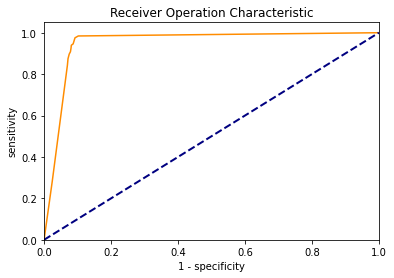

In [19]:
import matplotlib.pyplot as plt

plt.figure()
lw = 2

plt.plot(cmpl_sensitivity, sensitivity, color='darkorange')
plt.plot([0,1],[0,1],color='navy', lw=lw, linestyle='--')

plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])

plt.xlabel('1 - specificity')
plt.ylabel('sensitivity')
plt.title('Receiver Operation Characteristic')
plt.show()

In [20]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, pos_prob)

0.9563673071850335

In [27]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report

k=5
k_fold = StratifiedKFold(n_splits = k)

cleaned_mails_arr = np.array(cleaned_mails)
labels_arr = np.array(labels)

for trn_idx, test_idx in k_fold.split(cleaned_mails, labels):
  cv_train = CountVectorizer(stop_words="english", max_features=500)
  train_X = cleaned_mails_arr[trn_idx]
  train_Y = labels_arr[trn_idx]
  term_docs_train = cv_train.fit_transform(train_X)

  test_X = cleaned_mails_arr[test_idx]
  test_Y = labels_arr[test_idx]
  term_docs_test = cv_train.transform(test_X)

  clf = MultinomialNB(alpha=1.0)
  clf.fit(term_docs_train, train_Y)

  prediction = clf.predict(term_docs_test)
  print(classification_report(test_Y, prediction))

              precision    recall  f1-score   support

           0       0.94      0.92      0.93       734
           1       0.81      0.86      0.83       300

    accuracy                           0.90      1034
   macro avg       0.88      0.89      0.88      1034
weighted avg       0.90      0.90      0.90      1034

              precision    recall  f1-score   support

           0       0.95      0.91      0.93       734
           1       0.80      0.89      0.84       300

    accuracy                           0.90      1034
   macro avg       0.88      0.90      0.89      1034
weighted avg       0.91      0.90      0.91      1034

              precision    recall  f1-score   support

           0       0.97      0.93      0.95       734
           1       0.85      0.92      0.88       300

    accuracy                           0.93      1034
   macro avg       0.91      0.93      0.92      1034
weighted avg       0.93      0.93      0.93      1034

              preci